#### **Import Library**

In [390]:
import cv2                      # Untuk membaca gambar
import numpy as np              # Untuk manipulasi array dan gambar
import matplotlib.pyplot as plt # Untuk menampilkan gambar
import math                     # Untuk operasi matematika (sqrt)

#### **Membaca dan Mengkonversi Gambar**

In [391]:
img = cv2.imread('lucu.jpg') # Membaca gambar dalam format BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengubah BGR menjadi RGB dengan slicing

Menampilkan Ukuran Gambar

In [392]:
# Mendapatkan ukuran gambar
height, width, _ = rgb.shape
print(f"Ukuran gambar: {width} x {height}")

Ukuran gambar: 736 x 736


Menampilkan Gambar Asli

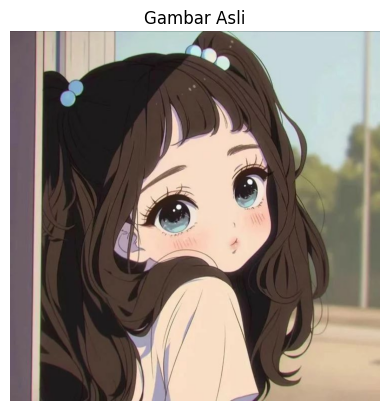

In [393]:
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

#### **Konversi Grayscale**

Fungsi Konversi ke Grayscale dengan Rumus Luminance

In [394]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Rumus standar konversi RGB ke grayscale
    return gray

Proses Konversi RGB ke Grayscale

In [395]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]  # Ambil pixel di koordinat (y,x)
        r, g, b = pixel
        gray = convert_to_grayscale(pixel)
        row.append(gray)

        # Menampilkan nilai piksel tiap 100 piksel sebagai sampel
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> R: {r}, G: {g}, B: {b}, Gray: {gray}')
    grayscale_img.append(row)

Pixel[0,0] -> R: 75, G: 60, B: 67, Gray: 65
Pixel[0,100] -> R: 109, G: 97, B: 109, Gray: 101
Pixel[0,200] -> R: 139, G: 126, B: 117, Gray: 128
Pixel[0,300] -> R: 115, G: 138, B: 132, Gray: 130
Pixel[0,400] -> R: 69, G: 54, B: 51, Gray: 58
Pixel[0,500] -> R: 122, G: 137, B: 142, Gray: 133
Pixel[0,600] -> R: 120, G: 138, B: 142, Gray: 133
Pixel[0,700] -> R: 118, G: 138, B: 139, Gray: 132
Pixel[100,0] -> R: 107, G: 92, B: 99, Gray: 97
Pixel[100,100] -> R: 29, G: 23, B: 25, Gray: 25
Pixel[100,200] -> R: 28, G: 26, B: 27, Gray: 26
Pixel[100,300] -> R: 30, G: 24, B: 26, Gray: 26
Pixel[100,400] -> R: 81, G: 61, B: 54, Gray: 66
Pixel[100,500] -> R: 72, G: 52, B: 41, Gray: 56
Pixel[100,600] -> R: 199, G: 217, B: 221, Gray: 212
Pixel[100,700] -> R: 194, G: 207, B: 213, Gray: 203
Pixel[200,0] -> R: 107, G: 90, B: 108, Gray: 97
Pixel[200,100] -> R: 29, G: 27, B: 28, Gray: 27
Pixel[200,200] -> R: 28, G: 26, B: 27, Gray: 26
Pixel[200,300] -> R: 87, G: 67, B: 58, Gray: 71
Pixel[200,400] -> R: 191, G:

Konversi Hasil Grayscale ke Array Numpy

In [396]:
grayscale_img = np.array(grayscale_img, dtype=np.uint8)
grayscale_img

array([[ 65,  65,  65, ..., 133, 132, 132],
       [ 88,  88,  88, ..., 216, 215, 215],
       [ 91,  91,  91, ..., 204, 203, 203],
       ...,
       [ 95,  95,  95, ..., 174, 174, 174],
       [ 95,  95,  95, ..., 174, 174, 174],
       [ 95,  95,  95, ..., 173, 173, 173]], dtype=uint8)

Menampilkan Gambar Hasil Konversi Grayscale

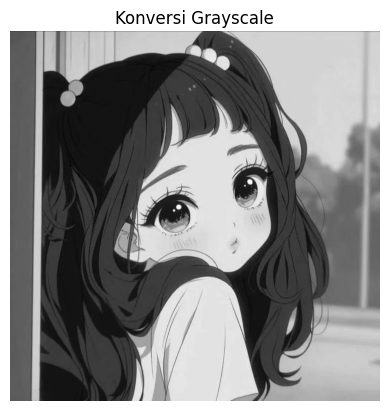

In [397]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Konversi Grayscale')
plt.show()

#### **Operator Sobel**

Mendefinisikan Kernel Sobel untuk Menghitung Gradient

In [398]:
Gx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]  # Deteksi perubahan horizontal

Gy = [[-1, -2, -1],
      [ 0,  0,  0],
      [ 1,  2,  1]]  # Deteksi perubahan vertikal

Mendefinisikan Fungsi Oprator Sobel

In [399]:
def apply_sobel_operator(img):
    # Siapkan array kosong untuk menyimpan hasil magnitudo gradien
    img = grayscale_img.astype(np.int32)
    gradient_magnitude = np.zeros((height, width), dtype=np.int32)

    # Looping tiap piksel, kecuali tepi
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0
            gy = 0

            # Hitung konvolusi 3x3 untuk Gx dan Gy
            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    gx += Gx[i][j] * pixel
                    gy += Gy[i][j] * pixel

            # Hitung magnitudo gradien dan batasi maksimum 255
            magnitude = math.sqrt(gx**2 + gy**2)
            gradient_magnitude[y, x] = min(int(magnitude), 255)

    return gradient_magnitude.astype(np.uint8)

Memanggil Fungsi dan Simpan Hasilnya

In [400]:
edges = apply_sobel_operator(grayscale_img)
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 104, 104, ..., 255, 255,   0],
       [  0,  16,  16, ...,  24,  24,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   4,   4,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

Menampilkan Gambar Hasil Deteksi Tepi (Edge Detection)

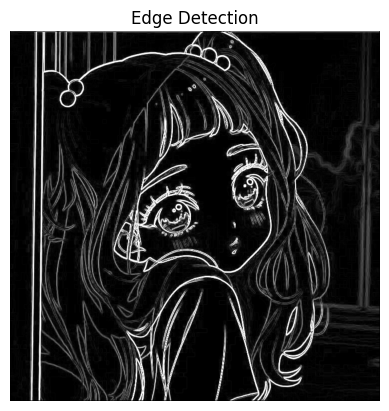

In [401]:
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()